# Importing required libraries for analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing website dataset

In [2]:
df = pd.read_csv("Website Dataset.csv")
df.head(5)

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


# Removing the unnamed column name from the data and assign actual column name to the columns

In [3]:
df.columns = df.iloc[0]
df = df.drop(index = 0).reset_index(drop = True)
df.columns = ["Channel group", "DateHour", "Users", "Sessions", "Engaged sessions", "Average engagement time per session", "Engaged sessions per user", "Events per session", "Engagement rate", "Event count"]

In [4]:
df.head()

,Channel group,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


# Checking the type of information present in the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Channel group                        3182 non-null   object
 1   DateHour                             3182 non-null   object
 2   Users                                3182 non-null   object
 3   Sessions                             3182 non-null   object
 4   Engaged sessions                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged sessions per user            3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


# Converting the DateHour column into date-time format

In [6]:
df["DateHour"] = pd.to_datetime(df["DateHour"], format="%Y%m%d%H", errors='coerce')


In [7]:
df.head()

,Channel group,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024-04-16 23:00:00,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024-04-17 23:00:00,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Channel group                        3182 non-null   object        
 1   DateHour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   object        
 3   Sessions                             3182 non-null   object        
 4   Engaged sessions                     3182 non-null   object        
 5   Average engagement time per session  3182 non-null   object        
 6   Engaged sessions per user            3182 non-null   object        
 7   Events per session                   3182 non-null   object        
 8   Engagement rate                      3182 non-null   object        
 9   Event count                          3182 non-null   object        
dtypes: datetime6

In [9]:
# Converting all columns into numeric columns except Channel_group and DateHour

In [10]:
numeric_cols = df.columns.drop(["Channel group","DateHour"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [11]:
df.head()

,Channel group,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Channel group                        3182 non-null   object        
 1   DateHour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
dtypes: datetime6

# Creating a Hour column from the DateHour column

In [13]:
df["Hour"] = df["DateHour"].dt.hour

In [14]:
df.head()

,Channel group,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


# Showing the basic statistical description of the dataset

In [15]:
df.describe()

,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


# Analysis Questions

## 1. What patterns of trends can you observe in website sessions and users over time?

Finding a relationship between the session and the users over time

In [16]:
sns.set(style = "whitegrid")

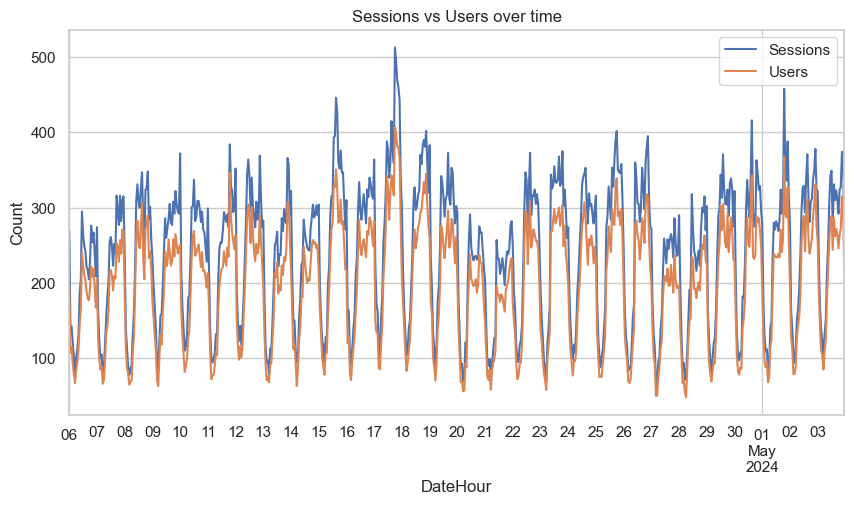

In [17]:
plt.figure(figsize=(10,5))
df.groupby("DateHour")[["Sessions", "Users"]].sum().plot(ax=plt.gca())
plt.title("Sessions vs Users over time")
plt.xlabel("DateHour")
plt.ylabel("Count")
plt.show()

# 2. Which marketing channel brought the highest number of users to the website, and how can we use this insight to improve traffic from other sources?

Total users by channel

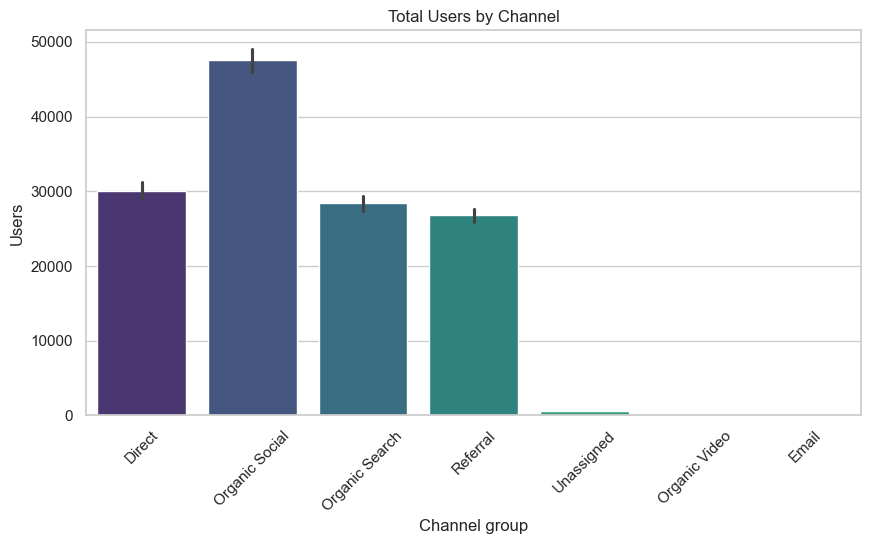

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Channel group", y="Users",hue="Channel group", estimator=np.sum, palette="viridis",legend=False)
plt.title("Total Users by Channel")
plt.xticks(rotation=45)
plt.show()

# 3. Which channel has the highest average enagaement time, and what does that tell us about user behaviour and content effectiveness?

Average engagement time by channel

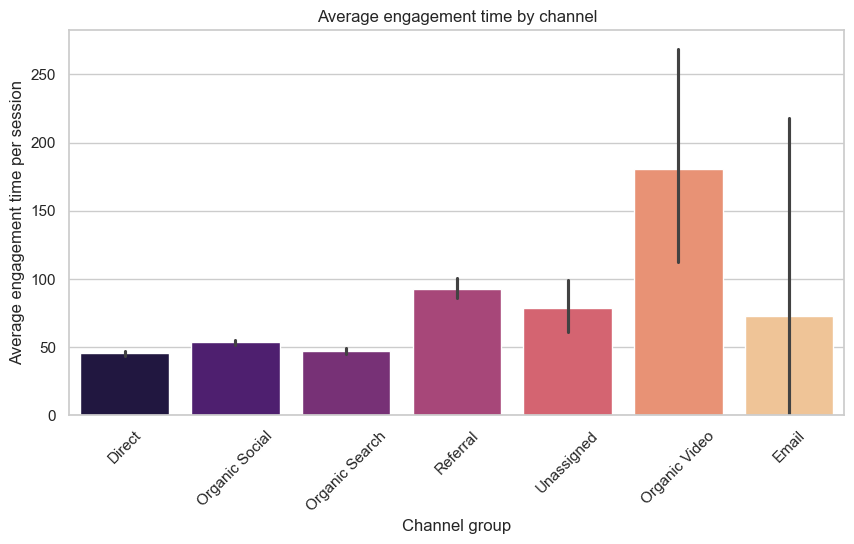

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x="Channel group", y="Average engagement time per session",hue="Channel group", estimator=np.mean,palette="magma")
plt.title("Average engagement time by channel")
plt.xticks(rotation=45)
plt.show()

# 4. How does engagement rate vary across different traffic channels?

Engagement rate distribution by channel

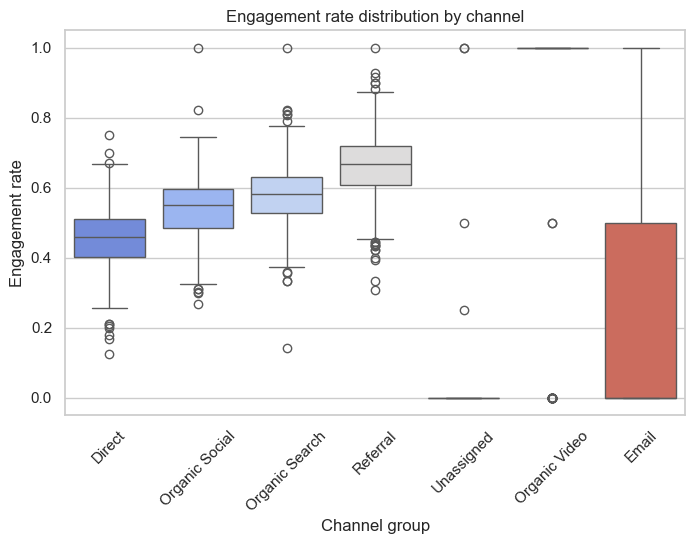

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Channel group", y="Engagement rate", hue="Channel group", palette="coolwarm")
plt.title("Engagement rate distribution by channel")
plt.xticks(rotation=45)
plt.show()

# 5. Which channel are driving more engaged sessions compared to non-engaged ones, and what strategies can improve engagement in underperforming channels? 

Engaged vs non-engaged sessions

In [21]:
session_df = df.groupby("Channel group")[["Sessions", "Engaged sessions"]].sum().reset_index()
session_df["Non-Engaged"] = session_df["Sessions"]-session_df["Engaged sessions"]
session_df_melted = session_df.melt(id_vars="Channel group", value_vars=["Engaged sessions", "Non-Engaged"])

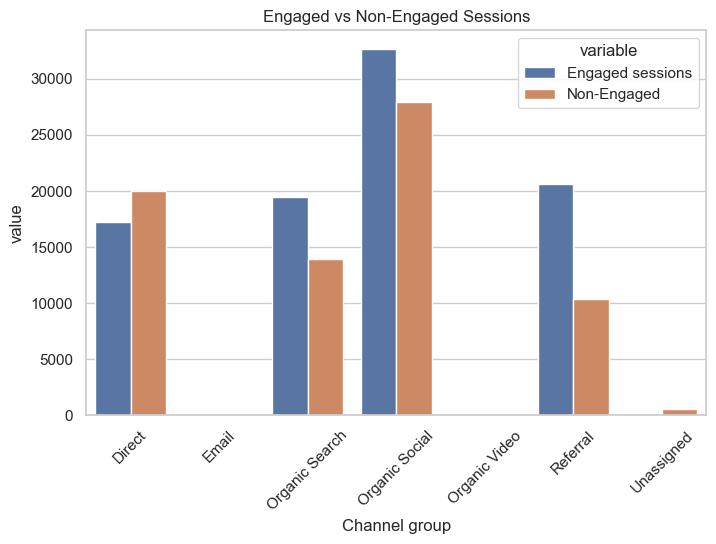

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(data=session_df_melted, x="Channel group", y="value", hue="variable")
plt.title("Engaged vs Non-Engaged Sessions")
plt.xticks(rotation=45)
plt.show()

# 6. At what hour of the day does each channel drive the most traffic?

Traffic by hour and channel

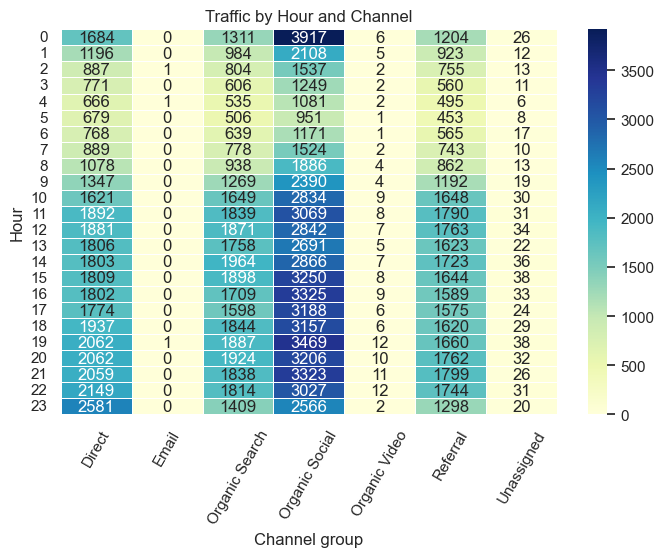

In [23]:
heatmap_data = df.groupby(["Hour", "Channel group"])["Sessions"].sum().unstack().fillna(0)

plt.figure(figsize=(8,5))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5, annot=True, fmt=".0f")
plt.title("Traffic by Hour and Channel")
plt.xlabel("Channel group")
plt.ylabel("Hour")
plt.xticks(rotation=60)
plt.show()

# 7. Is there any correlation between high traffic(sessions) and high engagement rate over time?

Engagement rate vs sessions over time

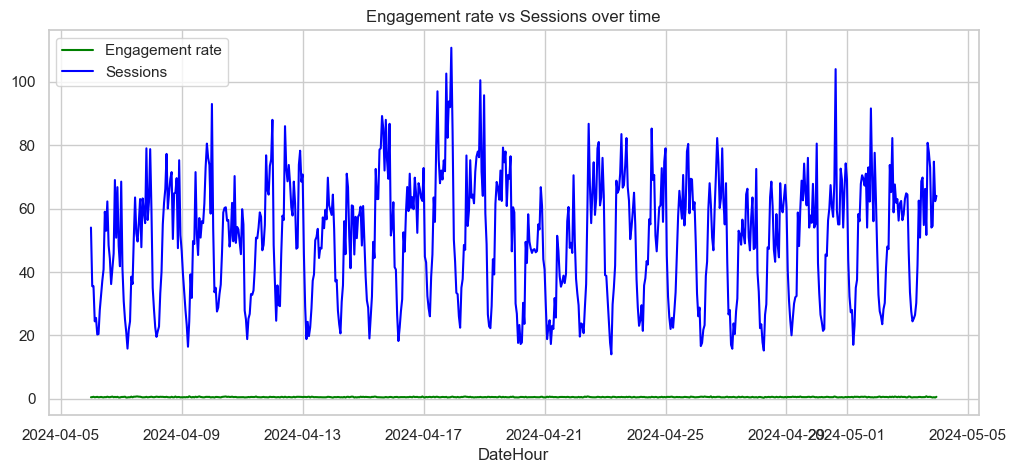

In [24]:
df_plot = df.groupby("DateHour")[["Engagement rate", "Sessions"]].mean().reset_index()

plt.figure(figsize=(12,5))
plt.plot(df_plot["DateHour"], df_plot["Engagement rate"], label="Engagement rate", color="green")
plt.plot(df_plot["DateHour"], df_plot["Sessions"], label="Sessions", color="blue")
plt.title("Engagement rate vs Sessions over time")
plt.xlabel("DateHour")
plt.legend()
plt.grid(True)
plt.show()
